Programming assignment 2: Random forests

Task 1: Working with a dataset with categorical features

In [1]:
# import needed libraries for all the tasks
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")




Step 1. 1-Reading the training data, 2- Display file, 3- Shuffle the data- 4-Split our training data

In [3]:
#Read the data file for training
data_train = pd.read_csv("C:\\Users\\Naqme\\Desktop\\BME\Machine Learning\\Assignment 2\\Adult Data\\adult_train.csv")

#Shuffle the training data
data_train_shuffled = data_train.sample(frac=1.0, random_state=0)

#Split the training file into X(input) and Y(output)
X_train=data_train_shuffled.drop('target', axis=1)
Y_train=data_train_shuffled['target']

#display training data
data_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


1-Reading the test data, 2- display the file, 3- Shuffle the data- 4-Split our test data

In [5]:
#Read the data file for testing
data_test = pd.read_csv("C:\\Users\\Naqme\\Desktop\\BME\Machine Learning\\Assignment 2\\Adult Data\\adult_test.csv")

#Shuffle the test data
data_test_shuffled = data_test.sample(frac=1.0, random_state=0)

#Split the test data into X(input) and Y(output)
X_test=data_test_shuffled.drop('target', axis=1)
Y_test=data_test_shuffled['target']

#display test data
data_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Step 2: Encoding the features as numbers

In [6]:
#convert X_train and X_test into dictionary
dicts_for_X_train = X_train.to_dict('records')
dicts_for_X_test = X_test.to_dict('records')

# make a DictVectorizer
dv = DictVectorizer()

#Here, "fit" will do the training same as previous assignment
#And then "transform" convert the data to matrix
#Training for "DictVectorizer" is: building the mapping from categories to column positions
X_train_encoded = dv.fit_transform(dicts_for_X_train)


X_test_encoded = dv.transform(dicts_for_X_test)


In [7]:
#using one of the classifiers from Assignment 1, we choose to use GradientBoostingClassifier
clf_Grad=GradientBoostingClassifier(random_state=0, max_depth=3)
clf_Grad.fit(X_train_encoded, Y_train)
Y_predict=clf_Grad.predict(X_test_encoded)

#compute cross-validation and accuracy score for the training set
mean_GradBoosting_Score = np.mean(cross_val_score(clf_Grad, X_train_encoded, Y_train, cv=5))
GradientBoosting_accuracy_score=accuracy_score(Y_test, Y_predict)

print("Cross Validation and Accuracy Score for GBClassifier are:", mean_GradBoosting_Score," and ",GradientBoosting_accuracy_score)

Cross Validation and Accuracy Score for GBClassifier are: 0.865636879708736  and  0.8711381364781033


Step 3. Combining the steps. As can be seen below, the built pipeline worked well since the accuract score is equal to the previous part.

In [8]:
#building a pipeline consisting of vectorization stepand GradientBoostingClassifieer
pipeline = make_pipeline(DictVectorizer(),GradientBoostingClassifier())

#using fit in pipeline, first calls fit_transform on all intermediate steps and then fit on the final step
pipeline.fit(dicts_for_X_train , Y_train)

#using predict, first calls transform on the intermediate steps and then predict on the final step
Y_pred = pipeline.predict(dicts_for_X_test )

#Chcking the pipeline accuracy
pipeline_accuracy_score=accuracy_score(Y_test, Y_pred)

print("Accuracy Score for pipeline is: ", pipeline_accuracy_score)

Accuracy Score for pipeline is:  0.8711381364781033


Task 2: Decision trees and random forests

Underfitting and overfitting in decision tree classifiers

<function matplotlib.pyplot.show(close=None, block=None)>

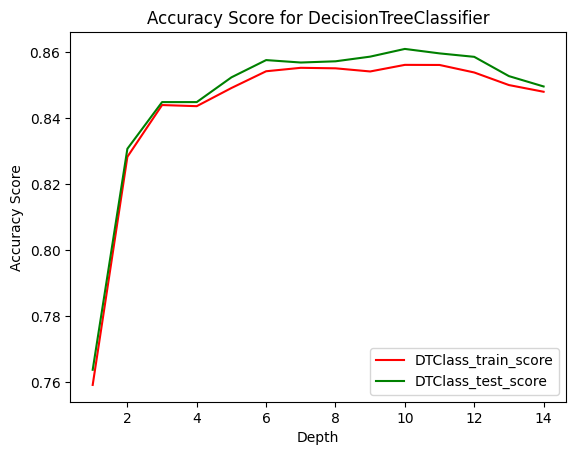

In [9]:
DTClass_train_score = []
DTClass_test_score = []
depths=[]
#Calculation of Accuracy for different max_depths for DecisionTreeClassifier
for depth in range(1,15):
    clf_dt=DecisionTreeClassifier(max_depth=depth,random_state=0)
    clf_dt.fit(X_train_encoded,Y_train)
    y_pred_dt=clf_dt.predict(X_test_encoded)
    training_score=np.mean(cross_val_score(clf_dt,X_train_encoded,Y_train,cv=5))
    testing_score=accuracy_score(y_pred_dt,Y_test)
    DTClass_train_score.append(training_score)
    DTClass_test_score.append(testing_score)
    depths.append(depth)

plt.plot(depths, DTClass_train_score, color="Red", label="DTClass_train_score")
plt.plot(depths, DTClass_test_score, color="Green", label="DTClass_test_score")
plt.title("Accuracy Score for DecisionTreeClassifier")
plt.xlabel("Depth")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show

Underfitting and overfitting in random forest classifiers.

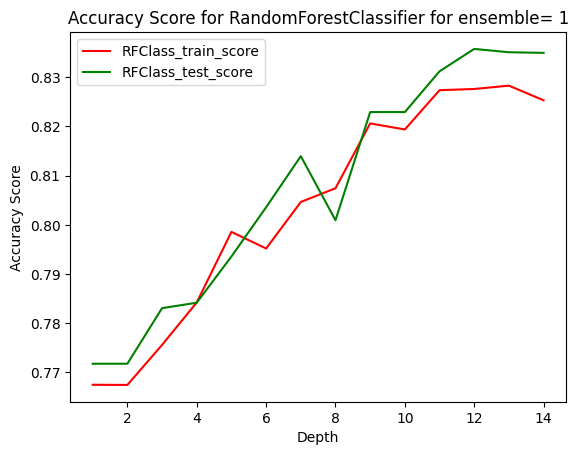

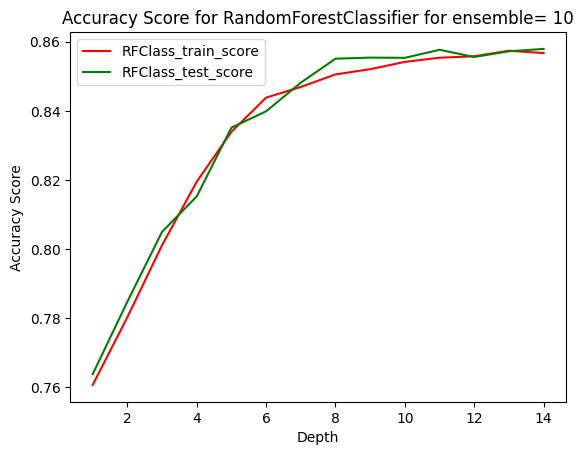

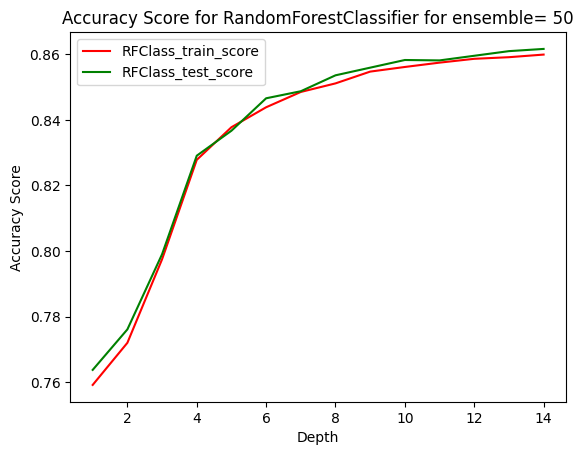

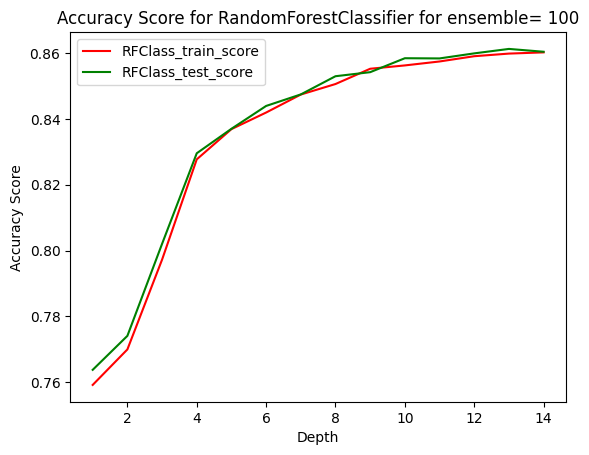

In [10]:
i=0
#Calculation of Accuracy for different ensemble sizes
for estimator in (1, 10,50,100):
    i=i+1
    RFClass_train_score = []
    RFClass_test_score = []
    rf_depths=[]
    #Calculation of Accuracy for max_depths betwen (1,15)
    for rfdepth in range(1,15):
        clf_rf=RandomForestClassifier(max_depth=rfdepth,n_estimators=estimator, random_state=0)
        clf_rf.fit(X_train_encoded,Y_train)
        y_pred_dt=clf_rf.predict(X_test_encoded)
        rf_training_score=np.mean(cross_val_score(clf_rf,X_train_encoded,Y_train,cv=5))
        rf_testing_score=accuracy_score(y_pred_dt,Y_test)
        RFClass_train_score.append(rf_training_score)
        RFClass_test_score.append(rf_testing_score)
        rf_depths.append(rfdepth)
    plt.figure(i)
    plt.plot(rf_depths, RFClass_train_score, color="Red", label="RFClass_train_score")
    plt.plot(rf_depths, RFClass_test_score, color="Green", label="RFClass_test_score")
    plt.title(f"Accuracy Score for RandomForestClassifier for ensemble= {estimator}")
    plt.xlabel("Depth")
    plt.ylabel("Accuracy Score")
    plt.legend()
    plt.show()    



What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?
As can be seen in the figures for DTC and first figure of RFC, the curve for DTC is much more smoother than RFC. The reason is that in RFC, the features are cgosen randomely. while DTC uses all features and picks the best feature as the root node.

What happens with the curve for random forests as the ensemble size grows?
As the size of the ensembles increase, it can be seen that the overfitting decreases.

What happens with the best observed test set accuracy as the ensemble size grows?
As the ensemble size grows, the curve for accuracy becomes smoother. And converges to a higher accuracy, in comparison with smaller ensembles. And does not have much variation any more with the increase of (max_depth).

What happens with the training time as the ensemble size grows?
The training time depends on (max depth) and (ensemble size). And training time increases linearly as the number of ensembles increase.

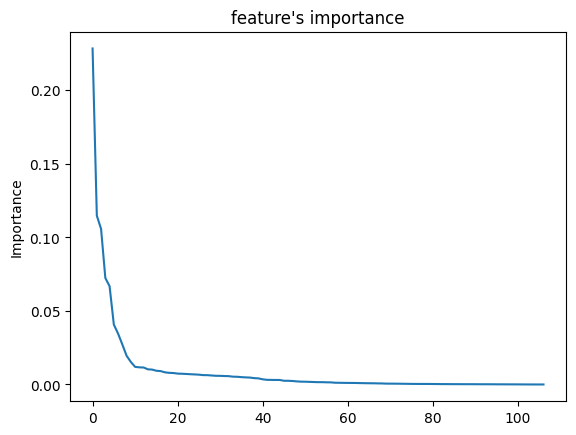

The most important feature: 'age'


In [14]:

pipeline = make_pipeline(DictVectorizer(),RandomForestClassifier())

features = (pipeline.fit(dicts_for_X_train , Y_train)).steps[0][1].feature_names_
importance = (pipeline.fit(dicts_for_X_train , Y_train)).steps[1][1].feature_importances_

reverseorder = np.argsort(importance)[::-1]
importancesorder = [importance[i] for i in reverseorder]
featuresorder = [features[i] for i in reverseorder]

plt.title("feature's importance")
plt.plot(range(len(reverseorder)), importancesorder)
plt.ylabel("Importance")
plt.show()

print(f"The most important feature: '{featuresorder[0]}'")

Premutation importance is another way of computing feature's importance score. In this procedure, a single feature is randomly shuffled. The consequent score decrease indicates the feature's importance.